In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.cluster import KMeans

In [17]:
df=pd.read_csv('advertising.csv')

In [18]:
df.info()
print("\nNull values:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB

Null values:
 TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [19]:
X=df[['TV','Radio','Newspaper']]
y=df['Sales']

C:\Users\Tcs\anaconda34\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Tcs\anaconda34\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Tcs\anaconda34\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Tcs\anaconda34\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

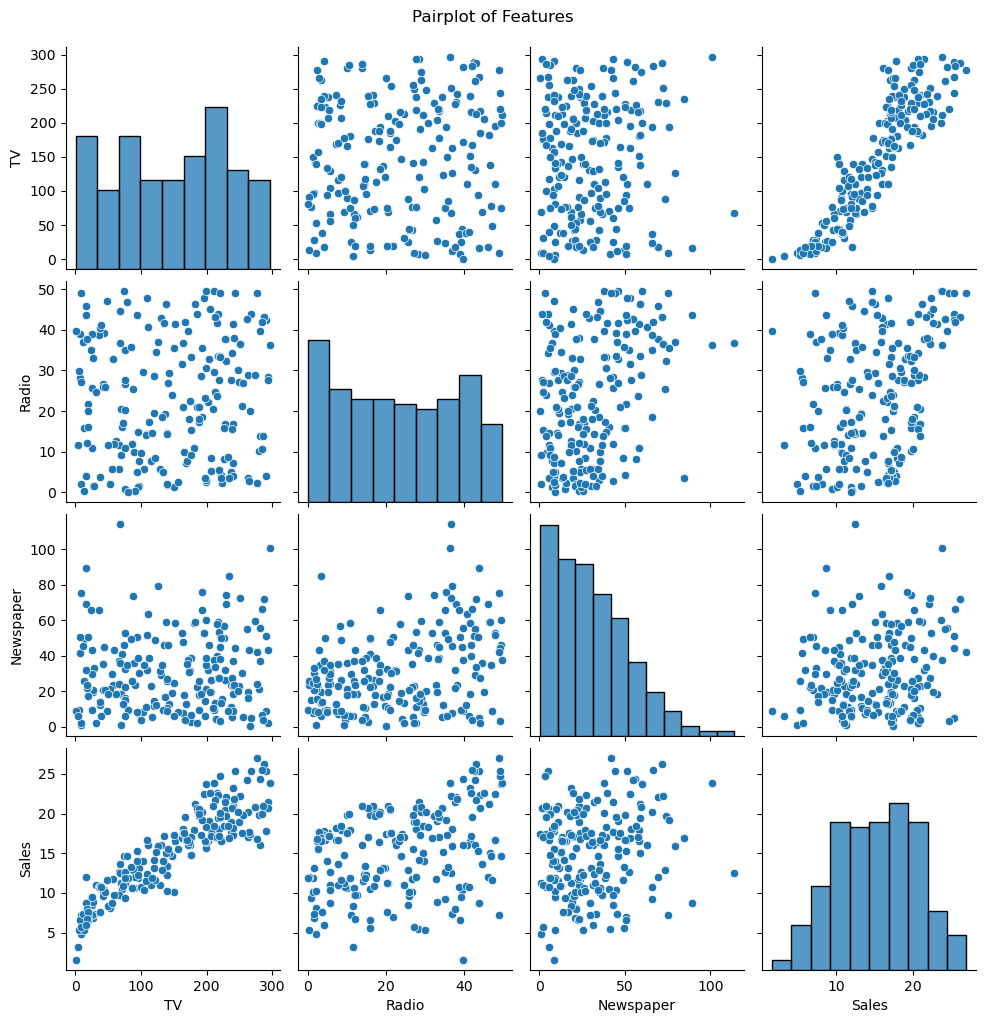

In [20]:
sns.pairplot(df[['TV','Radio','Newspaper','Sales']])
plt.suptitle("Pairplot of Features",y=1.02)
plt.show()

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)

LinearRegression()

In [23]:
linearprediction = linear_model.predict(X_test)

In [24]:
polypipeline = Pipeline([ ("Poly_features", PolynomialFeatures(degree=2)), ("lin_reg", LinearRegression())])
polypipeline.fit(X_train,y_train)
poly_pred=polypipeline.predict(X_test)

In [25]:
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_scaled, y_train)
svr_preds = svr_model.predict(X_test_scaled)

In [27]:
def evaluate_model(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return {"Model": name, "MAE": mae, "MSE": mse, "RMSE": rmse}

results = []
results.append(evaluate_model("Linear Regression", y_test, linearprediction))
results.append(evaluate_model("Polynomial Regression", y_test, poly_pred))
results.append(evaluate_model("SVR", y_test, svr_preds))

result_df = pd.DataFrame(results)
print(result_df)

                   Model       MAE       MSE      RMSE
0      Linear Regression  1.274826  2.907757  1.705215
1  Polynomial Regression  0.903371  1.442543  1.201059
2                    SVR  1.555355  4.421034  2.102626


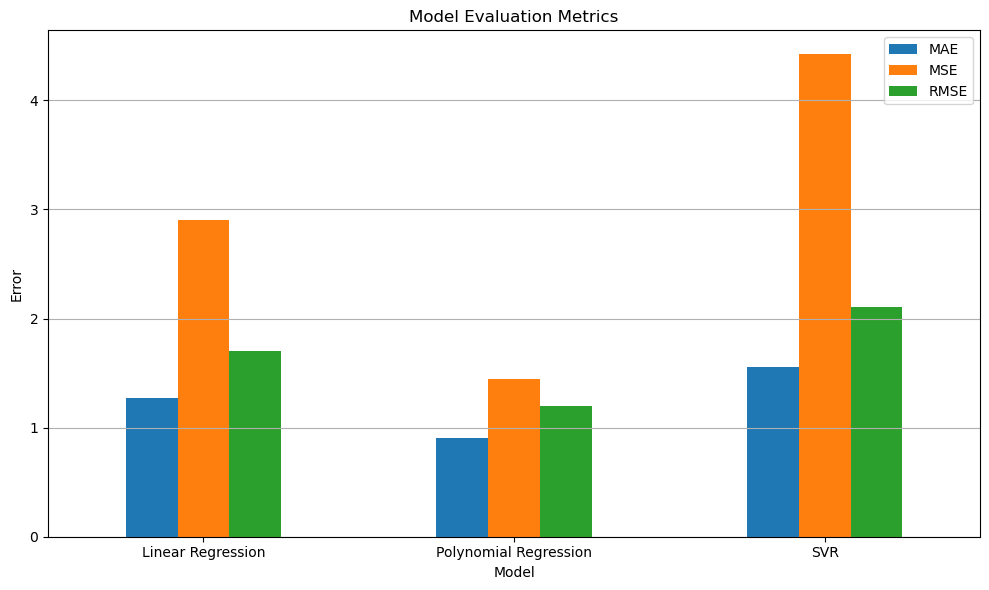

In [28]:
result_df.set_index("Model")[["MAE", "MSE", "RMSE"]].plot(kind="bar", figsize=(10, 6))
plt.title("Model Evaluation Metrics")
plt.ylabel("Error")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [29]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

C:\Users\Tcs\anaconda34\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Tcs\anaconda34\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


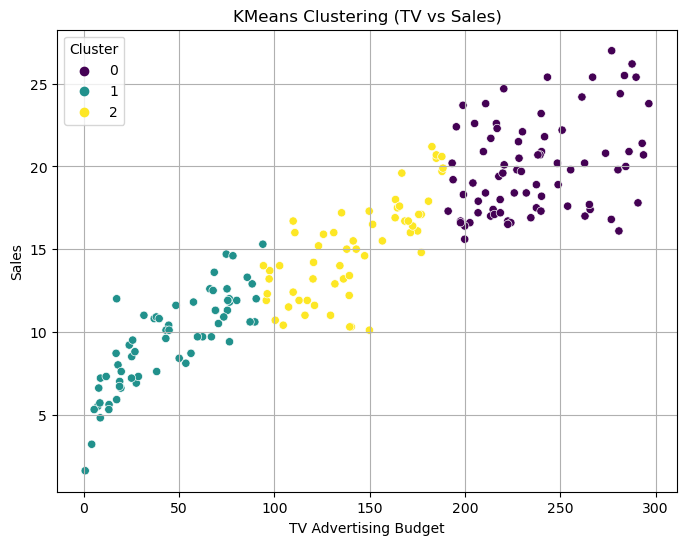

In [30]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="TV", y="Sales", hue="Cluster", palette="viridis")
plt.title("KMeans Clustering (TV vs Sales)")
plt.xlabel("TV Advertising Budget")
plt.ylabel("Sales")
plt.grid(True)
plt.show()